<a href="https://colab.research.google.com/github/Samuel-Ovuehor/Python-Code/blob/main/compresivestrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Concrete Compressive Strength Model

## Import necessary libraries
  

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score


## Reading the data

In [44]:
df = "/content/sample_data/Concrete_Data.xls"
data = pd.read_excel(df)

## Exploratory Data Analysis

In [45]:
# Remove extra spaces in column names
data.columns = data.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Print updated column names
print("Updated column names:")
print(data.columns)


Updated column names:
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals)'],
      dtype='object')


In [46]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [47]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water (component 4)(kg in a m^3 mixture)               1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate (component 6)(kg in a m^3 mixture)    1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

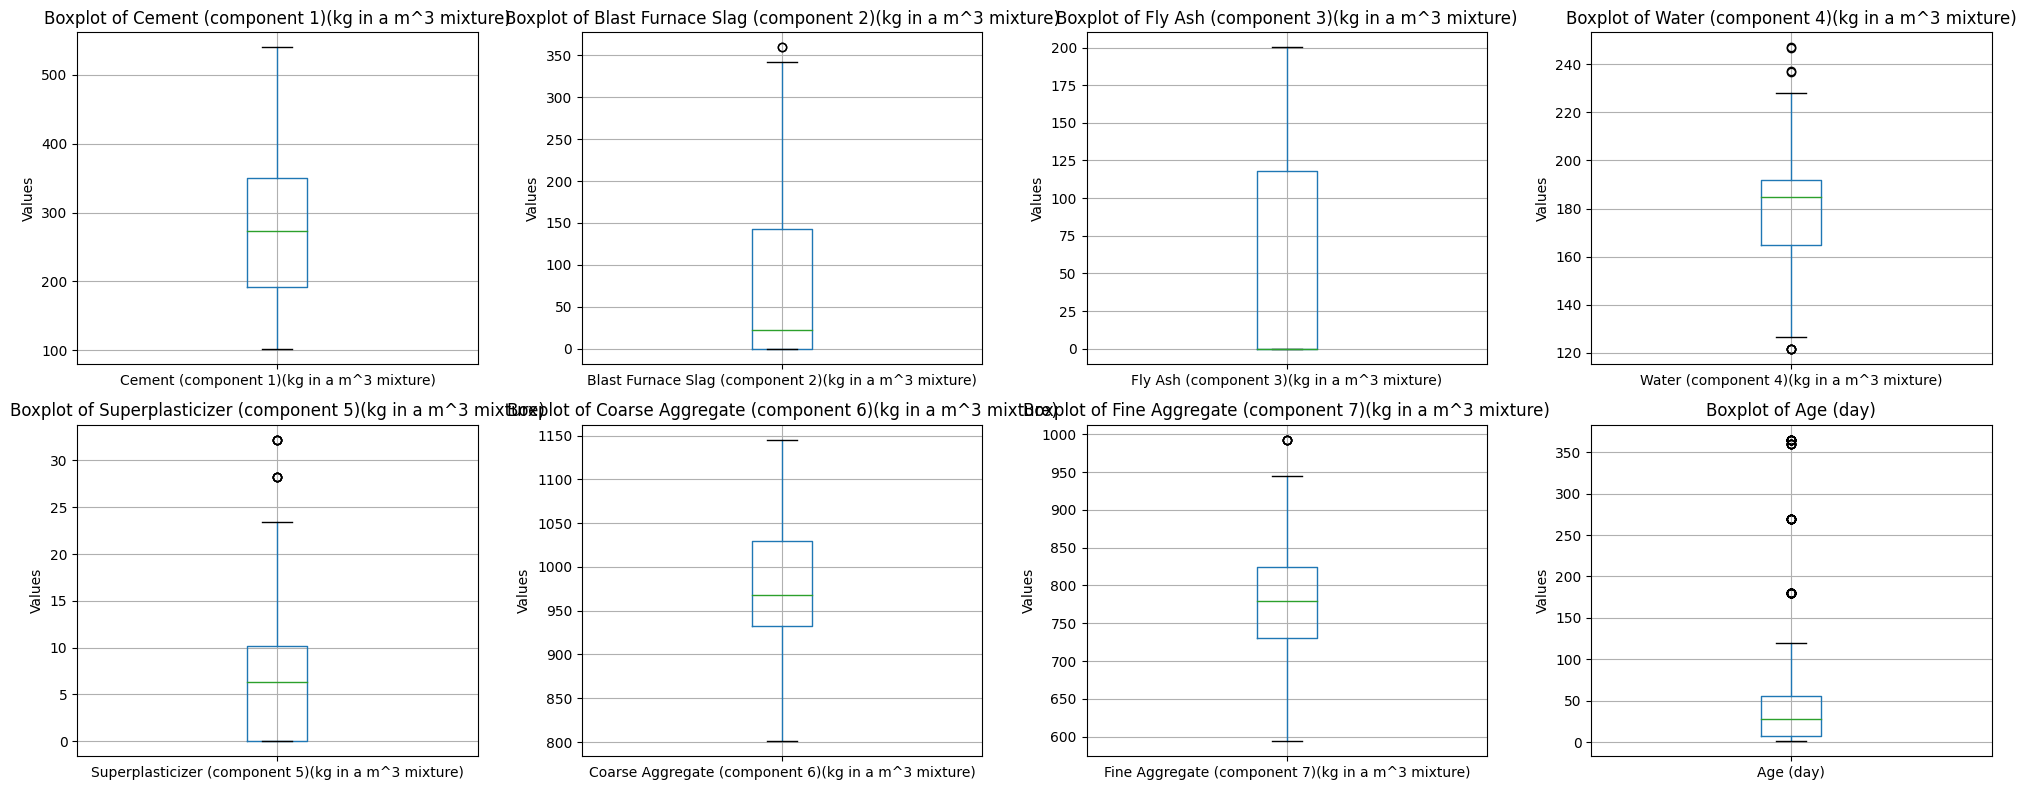

In [49]:
# List of column indices to plot (assuming these are the indices in your DataFrame)
variable_indices = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjust based on your DataFrame structure

# Set up the figure and subplots
plt.figure(figsize=(20, 8))

# Loop through each variable index and create a boxplot
for i, var_idx in enumerate(variable_indices):
    plt.subplot(2, 4, i + 1)  # Create a 2x4 grid of subplots for 8 variables
    data.boxplot(column=data.columns[var_idx])  # Reference by index
    plt.title(f'Boxplot of {data.columns[var_idx]}')  # Title using column name
    plt.xlabel('')  # Remove xlabel as it is redundant
    plt.ylabel('Values')
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## Correlation

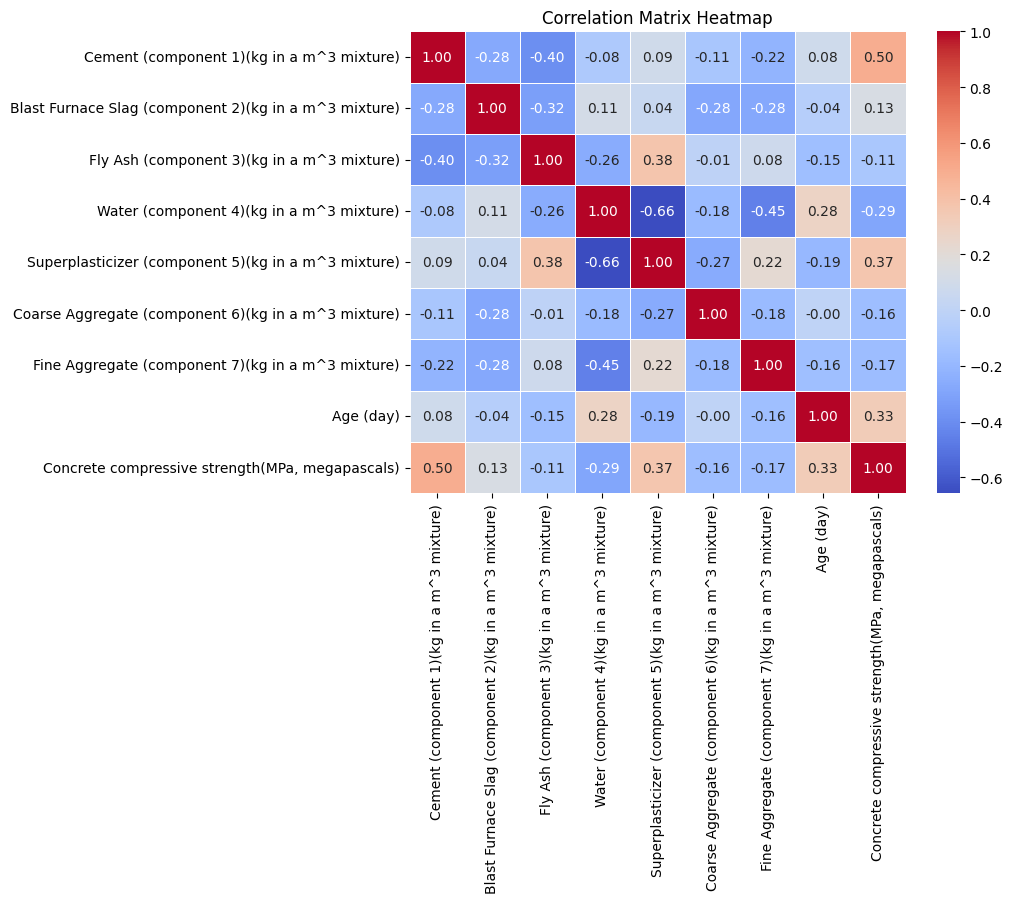

In [50]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Handling the outlies

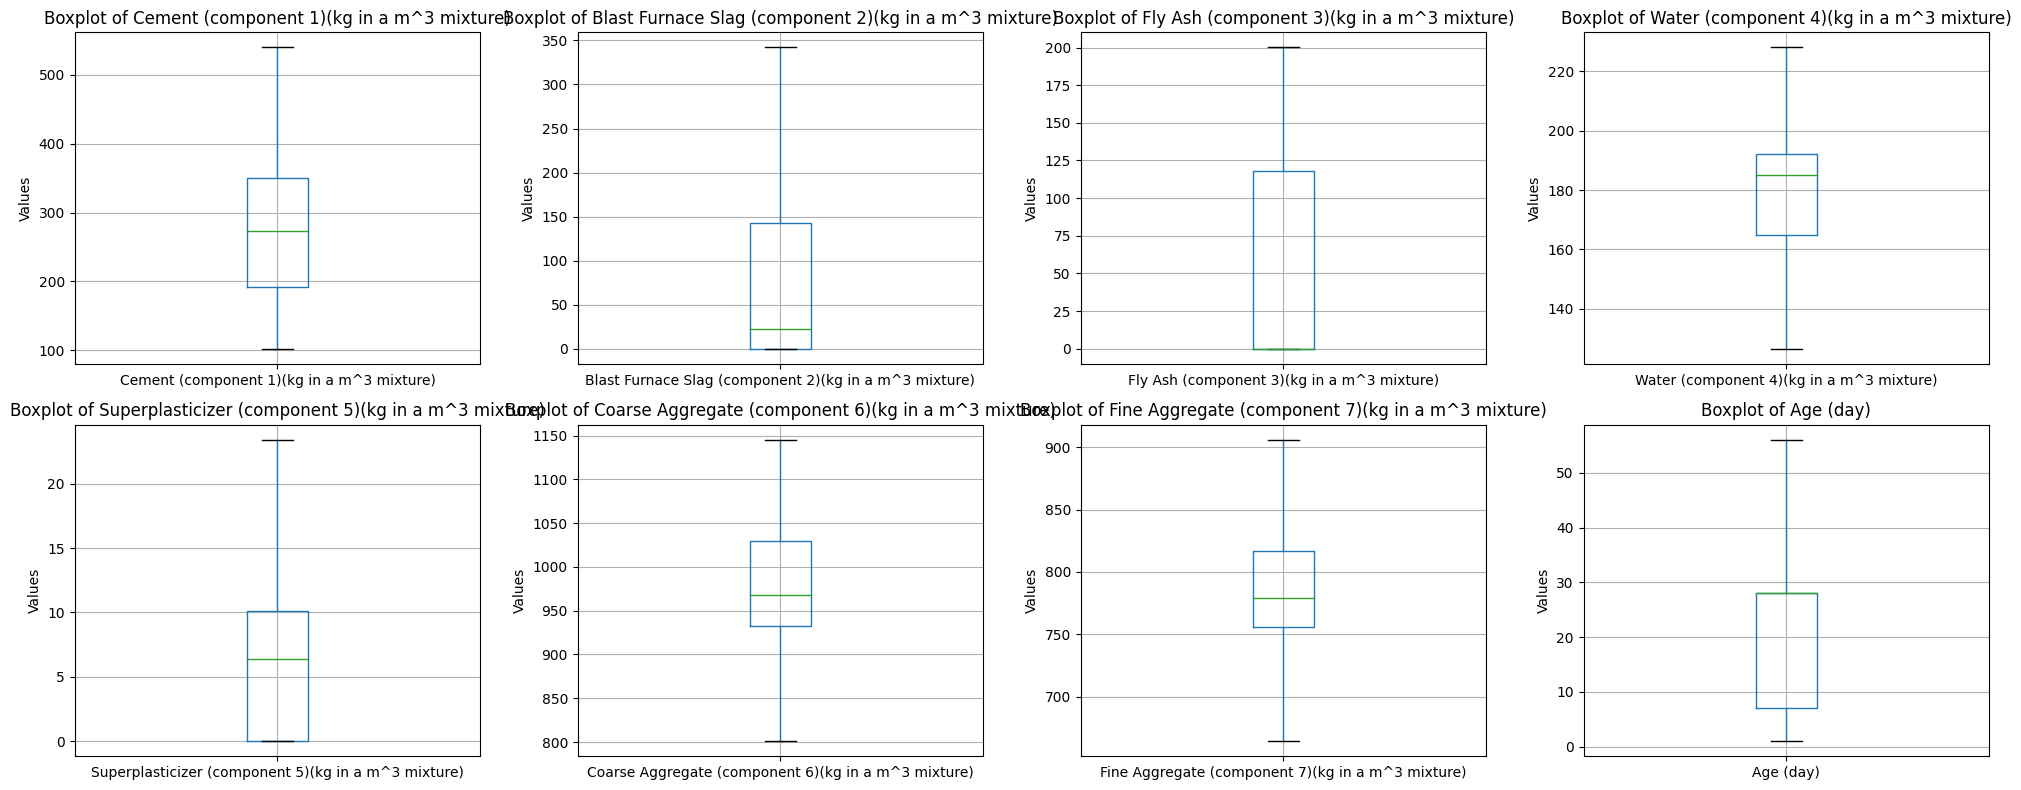

In [51]:
# Function to replace outliers with the median using the IQR method with a stricter threshold
def replace_outliers_with_median(df, column):
    # Ensure the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Drop NaN values before calculations
        clean_column = df[column].dropna()

        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = clean_column.quantile(0.25)
        Q3 = clean_column.quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate the median of the column
        median_value = clean_column.median()

        # Replace outliers with the median value
        df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df

# Apply the function to numeric columns only
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']):
        data = replace_outliers_with_median(data, 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)')

for column in data.columns:
    if pd.api.types.is_numeric_dtype(data['Water (component 4)(kg in a m^3 mixture)']):
        data = replace_outliers_with_median(data, 'Water (component 4)(kg in a m^3 mixture)')

for column in data.columns:
    if pd.api.types.is_numeric_dtype(data['Superplasticizer (component 5)(kg in a m^3 mixture)']):
        data = replace_outliers_with_median(data, 'Superplasticizer (component 5)(kg in a m^3 mixture)')

for column in data.columns:
    if pd.api.types.is_numeric_dtype(data['Fine Aggregate (component 7)(kg in a m^3 mixture)']):
        data = replace_outliers_with_median(data, 'Fine Aggregate (component 7)(kg in a m^3 mixture)')

for column in data.columns:
    if pd.api.types.is_numeric_dtype(data['Age (day)']):
        data = replace_outliers_with_median(data, 'Age (day)')

variable_indices1 = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjust based on your DataFrame structure

# Set up the figure and subplots
plt.figure(figsize=(20, 8))

# Loop through each variable index and create a boxplot
for i, var_idx in enumerate(variable_indices1):
    plt.subplot(2, 4, i + 1)  # Create a 2x4 grid of subplots for 8 variables
    data.boxplot(column=data.columns[var_idx])  # Reference by index
    plt.title(f'Boxplot of {data.columns[var_idx]}')  # Title using column name
    plt.xlabel('')  # Remove xlabel as it is redundant
    plt.ylabel('Values')
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Training Algorithms & Evaluation

In [52]:
# selecting the target variable/features
X = data.drop('Concrete compressive strength(MPa, megapascals)', axis=1)  # Features
y = data['Concrete compressive strength(MPa, megapascals)']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Standardize the features for KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)  # set to 5
svr_model = SVR(kernel='rbf')  # RBF ("Radial Basis Function" kernel)to  capture more complex patterns

In [55]:
# Train models
rf_model.fit(X_train, y_train)
knn_model.fit(X_train_scaled, y_train)  # KNN with scaled data
svr_model.fit(X_train_scaled, y_train)  # SVR with scaled data

SVR()

In [56]:
# Predict with the models
rf_predictions = rf_model.predict(X_test)
knn_predictions = knn_model.predict(X_test_scaled)
svr_predictions = svr_model.predict(X_test_scaled)

In [57]:
# Evaluate models using Mean Squared Error and R^2 Score
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the evaluation metrics
print("Random Forest:")
print(f"  MSE: {rf_mse:.4f}")
print(f"  R^2 Score: {rf_r2:.4f}")

knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Print the evaluation metrics
print("\nK-Nearest Neighbors:")
print(f"  MSE: {knn_mse:.4f}")
print(f"  R^2 Score: {knn_r2:.4f}")

svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Print the evaluation metrics
print("\nSupport Vector Regression:")
print(f"  MSE: {svr_mse:.4f}")
print(f"  R^2 Score: {svr_r2:.4f}")

Random Forest:
  MSE: 43.2055
  R^2 Score: 0.8323

K-Nearest Neighbors:
  MSE: 58.0719
  R^2 Score: 0.7746

Support Vector Regression:
  MSE: 78.9134
  R^2 Score: 0.6938


# Visualization - True values vs Predicted values

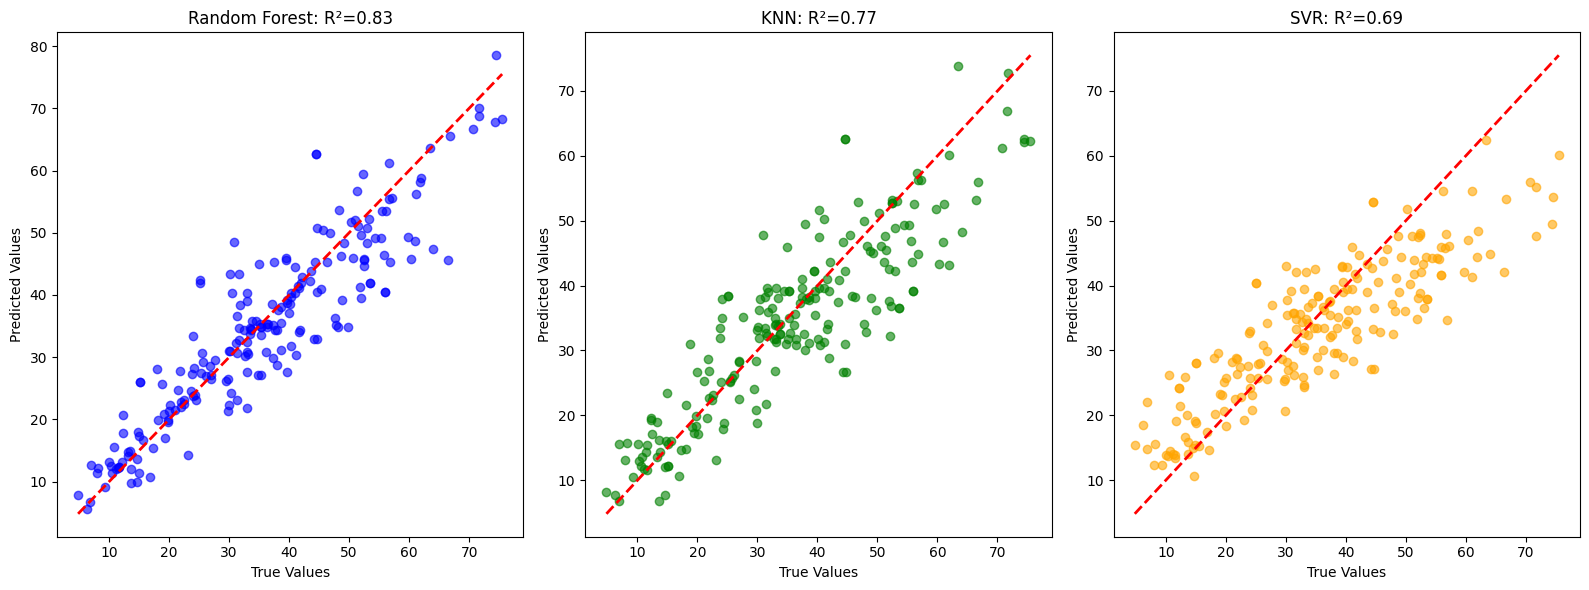

In [58]:
plt.figure(figsize=(16, 6))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(y_test, rf_predictions, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title(f'Random Forest: R²={rf_r2:.2f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# K-Nearest Neighbors
plt.subplot(1, 3, 2)
plt.scatter(y_test, knn_predictions, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title(f'KNN: R²={knn_r2:.2f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Support Vector Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, svr_predictions, alpha=0.6, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title(f'SVR: R²={svr_r2:.2f}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


### hyperparameter turning  and cross-validation

In [59]:
# Define the models and their hyperparameter grids for tuning
models = {
    "Random Forest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),

    "K-Nearest Neighbors": (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }),

    "Support Vector Regression": (SVR(), {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    })
}

# Function for hyperparameter tuning and cross-validation
def tune_and_evaluate(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Cross-validation to get average score
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = np.mean(cv_scores)

    return best_model, best_params, -mean_cv_score

# Store the results
results = {}

# Loop through models for tuning and evaluation
for model_name, (model, param_grid) in models.items():
    best_model, best_params, mean_cv_score = tune_and_evaluate(model, param_grid, X_train_scaled if model_name != "Random Forest" else X_train, y_train)
    results[model_name] = {
        'best_model': best_model,
        'best_params': best_params,
        'mean_cv_score': mean_cv_score
    }

# Evaluate the best models on the test set
for model_name, result in results.items():
    test_predictions = result['best_model'].predict(X_test_scaled if model_name != "Random Forest" else X_test)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    print(f"{model_name} after tuning:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Mean CV MSE: {result['mean_cv_score']:.4f}")
    print(f"  Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}\n")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest after tuning:
  Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
  Mean CV MSE: 36.8178
  Test MSE: 43.3004, R²: 0.8320

K-Nearest Neighbors after tuning:
  Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
  Mean CV MSE: 56.5370
  Test MSE: 53.7086, R²: 0.7916

Support Vector Regression after tuning:
  Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
  Mean CV MSE: 43.9486
  Test MSE: 44.1406, R²: 0.8287



Residual analysis

In [60]:
# Import necessary metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  X_train, X_test, y_train, y_test, and the trained models are already defined
for model_name, result in results.items():
    # Use scaled data for KNN and SVR, raw data for Random Forest
    X_train_used = X_train_scaled if model_name != "Random Forest" else X_train
    X_test_used = X_test_scaled if model_name != "Random Forest" else X_test

    # Predictions for training data
    train_predictions = result['best_model'].predict(X_train_used)

    # Predictions for testing data
    test_predictions = result['best_model'].predict(X_test_used)

    # Calculate metrics for the train set
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)  # Root Mean Squared Error
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)

    # Calculate metrics for the test set
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)  # Root Mean Squared Error
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics for each model
    print(f"{model_name} after tuning:")
    print(f"  Best Parameters: {result['best_params']}")

    # Train metrics
    print(f"  Train MSE: {train_mse:.4f}")
    print(f"  Train RMSE: {train_rmse:.4f}")
    print(f"  Train MAE: {train_mae:.4f}")
    print(f"  Train R²: {train_r2:.4f}")

    # Test metrics
    print(f"  Test MSE: {test_mse:.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  Test MAE: {test_mae:.4f}")
    print(f"  Test R²: {test_r2:.4f}\n")



Random Forest after tuning:
  Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
  Train MSE: 10.7939
  Train RMSE: 3.2854
  Train MAE: 2.4002
  Train R²: 0.9620
  Test MSE: 43.3004
  Test RMSE: 6.5803
  Test MAE: 4.7612
  Test R²: 0.8320

K-Nearest Neighbors after tuning:
  Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
  Train MSE: 6.5716
  Train RMSE: 2.5635
  Train MAE: 1.1762
  Train R²: 0.9769
  Test MSE: 53.7086
  Test RMSE: 7.3286
  Test MAE: 5.1184
  Test R²: 0.7916

Support Vector Regression after tuning:
  Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
  Train MSE: 31.6872
  Train RMSE: 5.6291
  Train MAE: 3.7970
  Train R²: 0.8885
  Test MSE: 44.1406
  Test RMSE: 6.6438
  Test MAE: 4.7729
  Test R²: 0.8287



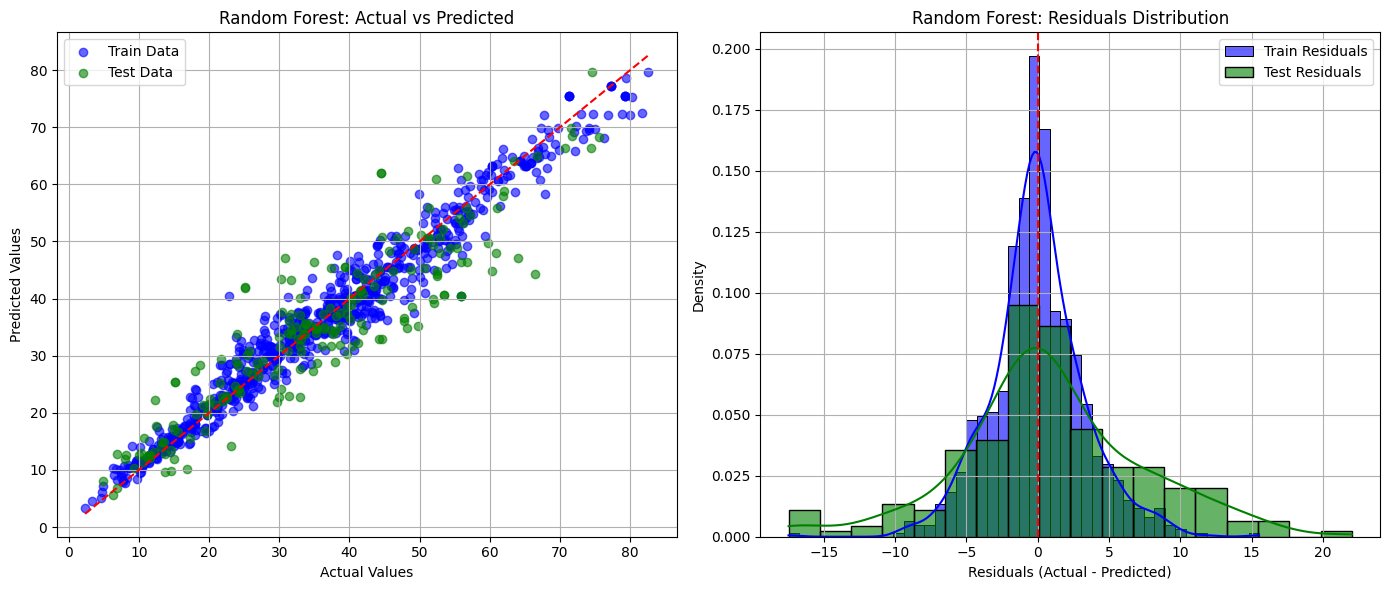

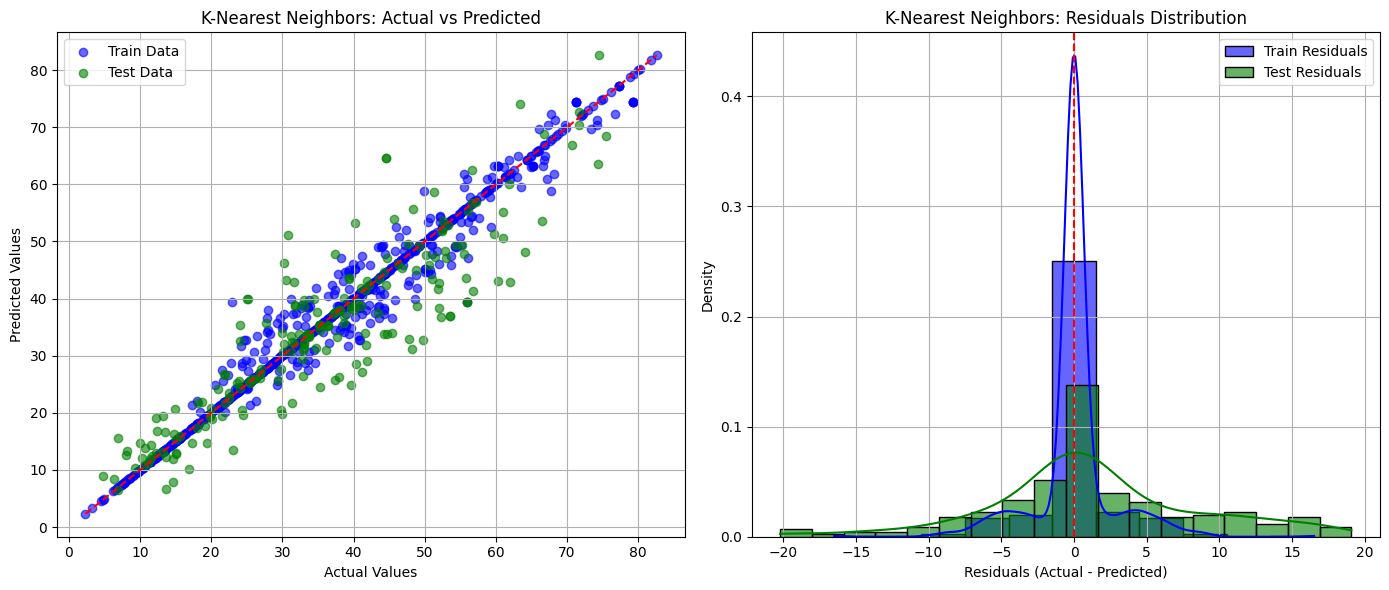

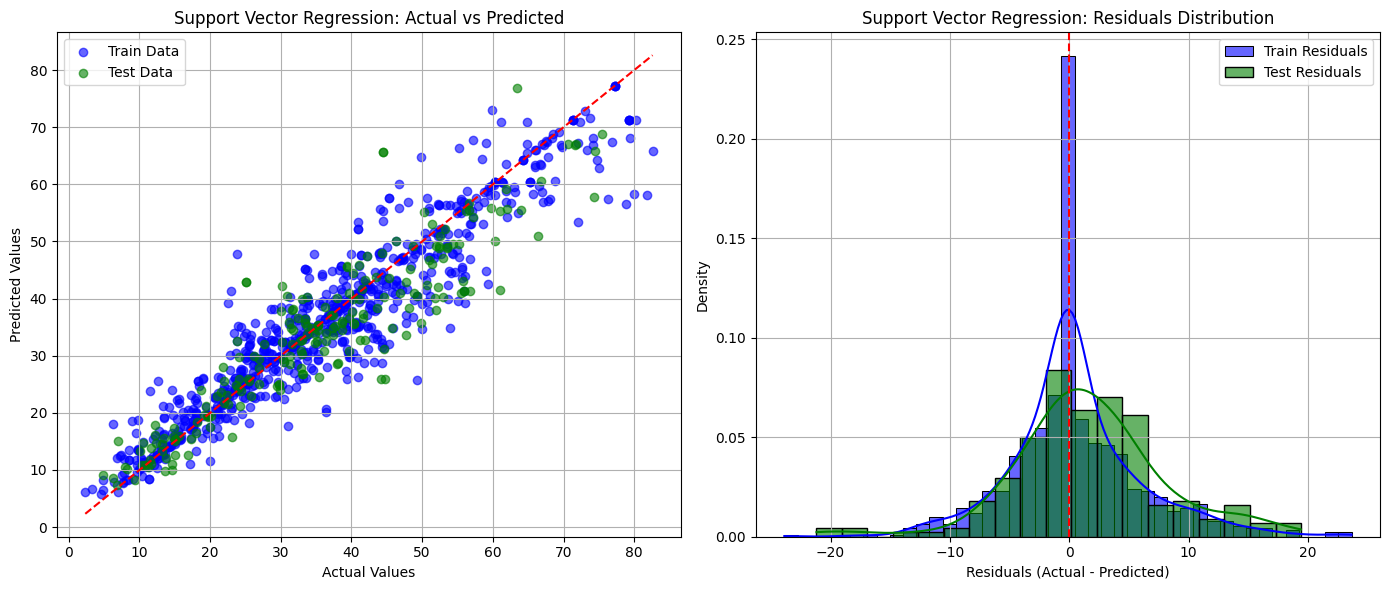

In [ ]:
# Helper function to plot actual vs predicted and residuals
def plot_model_performance(model_name, y_train, train_predictions, y_test, test_predictions):
    plt.figure(figsize=(14, 6))

    # Actual vs Predicted for Train and Test data
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, train_predictions, color='blue', label='Train Data', alpha=0.6)
    plt.scatter(y_test, test_predictions, color='green', label='Test Data', alpha=0.6)
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)

    # Residuals (Errors)
    plt.subplot(1, 2, 2)
    train_residuals = y_train - train_predictions
    test_residuals = y_test - test_predictions
    sns.histplot(train_residuals, color='blue', label='Train Residuals', kde=True, stat="density", alpha=0.6)
    sns.histplot(test_residuals, color='green', label='Test Residuals', kde=True, stat="density", alpha=0.6)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'{model_name}: Residuals Distribution')
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualizing for all models
for model_name, result in results.items():
    X_train_used = X_train_scaled if model_name != "Random Forest" else X_train
    X_test_used = X_test_scaled if model_name != "Random Forest" else X_test

    # Get predictions for train and test data
    train_predictions = result['best_model'].predict(X_train_used)
    test_predictions = result['best_model'].predict(X_test_used)

    # Plot model performance
    plot_model_performance(model_name, y_train, train_predictions, y_test, test_predictions)

